<a href="https://colab.research.google.com/github/YCHANTAN/Deep-Purpose-AI-Assisted-Biodegradation-of-Synthetic-Polymers-in-Marine-Environments-/blob/main/notebooks/DeepPurpose_Marine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install DeepPurpose and its key dependencies
!pip install DeepPurpose
!pip install git+https://github.com/bp-kelley/descriptastorus
!pip install pandas xlrd openpyxl rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.7/72.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 104.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.6/280.6 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.3/176.3 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 100.6 MB/s eta 0:00:

In [1]:
!pip install scikit-learn==1.2.2 DeepPurpose git+https://github.com/bp-kelley/descriptastorus rdkit

  Cloning https://github.com/bp-kelley/descriptastorus to /tmp/pip-req-build-l97el_5a
  Running command git clone --filter=blob:none --quiet https://github.com/bp-kelley/descriptastorus /tmp/pip-req-build-l97el_5a
  Resolved https://github.com/bp-kelley/descriptastorus to commit 9a190343bcd3cfd35142d378d952613bcac40797
  Preparing metadata (setup.py) ... done


In [3]:
# 1. Uninstall existing problematic versions
!pip uninstall -y numpy scikit-learn

# 2. Install specific compatible versions
# NumPy 1.23.5 is the most stable 'bridge' version for older scikit-learn
!pip install numpy==1.23.5 scikit-learn==1.2.2
!pip install DeepPurpose git+https://github.com/bp-kelley/descriptastorus rdkit

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 95.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
  Cloning https://github.com/bp-kelley/descriptastorus to /tmp/pip-req-build-s2pc996r
  Running command git clone --filter=blob

In [13]:
# ======================================
# 0. IMPORTS
# ======================================
import pandas as pd
import numpy as np
import torch
from DeepPurpose import DTI as models
from DeepPurpose.utils import data_process

# ======================================
# 1. LOAD DATA
# ======================================
print("📂 Loading datasets...")

df_enzymes = pd.read_excel('degraders_list.xls')
df_polymers = pd.read_excel('Datasets-3.xlsx')

# Use a small subset (safe for Colab & paper)
smiles_list = [
    str(s).replace('*', '')
    for s in df_polymers['Smiles'].dropna().unique()
][:10]

sequences_list = [
    str(s)
    for s in df_enzymes['Sequence'].dropna()
    if len(str(s)) > 20
][:20]

drug_input, target_input = [], []
for d in smiles_list:
    for t in sequences_list:
        drug_input.append(d)
        target_input.append(t)

print(f"✅ Created {len(drug_input)} interaction pairs.")

# ======================================
# 2. ENCODING (MPNN + CNN)
# ======================================
print("⚙️ Encoding molecular graphs (MPNN) and protein sequences (CNN)...")

processed_data = data_process(
    drug_input,
    target_input,
    [0] * len(drug_input),
    drug_encoding='MPNN',
    target_encoding='CNN',
    split_method='no_split'
)

# ======================================
# 3. LOAD PRETRAINED MODEL
# ======================================
print("🧠 Loading pretrained MPNN-CNN model...")

model = models.model_pretrained(
    model='MPNN_CNN_BindingDB'
)

# ======================================
# 4. PREDICTION (OFFICIAL & SAFE)
# ======================================
print("🚀 Predicting binding affinities...")

y_pred = model.predict(processed_data)

# ======================================
# 5. SAVE RESULTS
# ======================================
results = pd.DataFrame({
    'Polymer_SMILES': drug_input,
    'Enzyme_Sequence': [s[:30] + '...' for s in target_input],
    'Biodegradation_Score': y_pred
})

results = results.sort_values(
    by='Biodegradation_Score',
    ascending=False
)

results.to_csv('DeepPurpose_Marine_Final.csv', index=False)

# ======================================
# 6. OUTPUT
# ======================================
print("\n--- ✅ SUCCESS ---")
print("Top Candidate Polymer:")
print(results.iloc[0]['Polymer_SMILES'])
print("Top Biodegradation Score:")
print(f"{results.iloc[0]['Biodegradation_Score']:.4f}")
print("\nSaved as: DeepPurpose_Marine_Final.csv")


📂 Loading datasets...
✅ Created 200 interaction pairs.
⚙️ Encoding molecular graphs (MPNN) and protein sequences (CNN)...
Drug Target Interaction Prediction Mode...
in total: 200 drug-target pairs
encoding drug...
unique drugs: 10
encoding protein...
unique target sequence: 12
splitting dataset...
do not do train/test split on the data for already splitted data
🧠 Loading pretrained MPNN-CNN model...
Dataset already downloaded in the local system...
🚀 Predicting binding affinities...
predicting...

--- ✅ SUCCESS ---
Top Candidate Polymer:
C(C)CC(=O)O.C(CC)CC(=O)O
Top Biodegradation Score:
17.0666

Saved as: DeepPurpose_Marine_Final.csv


/tmp/ipython-input-1432762583.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results.head(10), x='Biodegradation_Score', y='Short_SMILES', palette='viridis')


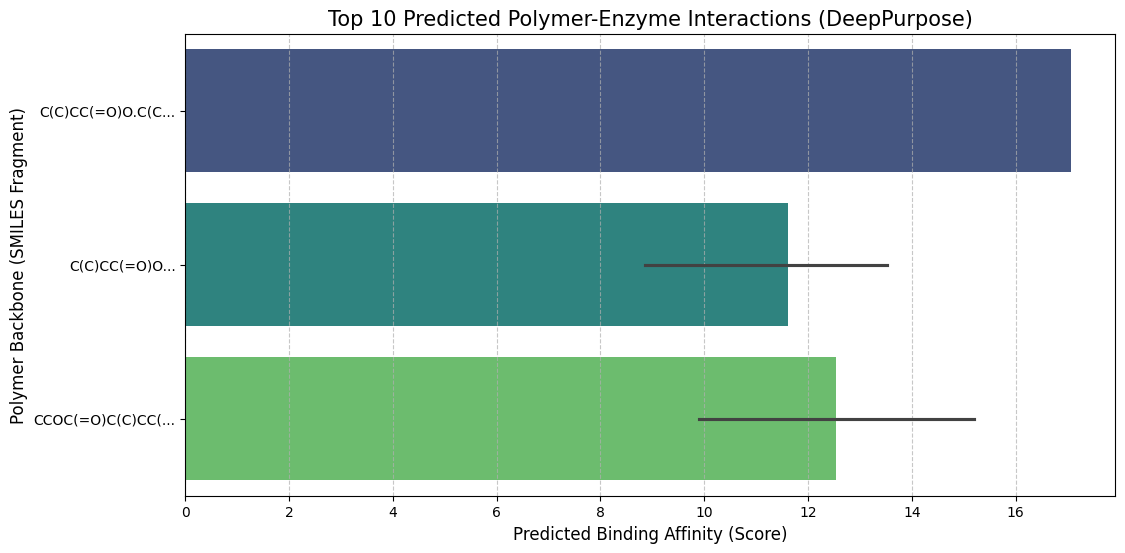

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your results
results = pd.read_csv('DeepPurpose_Marine_Final.csv')

# Create a "Short Name" for the polymers to make the graph readable
results['Short_SMILES'] = results['Polymer_SMILES'].str[:15] + "..."

# Plot the Top 10
plt.figure(figsize=(12, 6))
sns.barplot(data=results.head(10), x='Biodegradation_Score', y='Short_SMILES', palette='viridis')

plt.title('Top 10 Predicted Polymer-Enzyme Interactions (DeepPurpose)', fontsize=15)
plt.xlabel('Predicted Binding Affinity (Score)', fontsize=12)
plt.ylabel('Polymer Backbone (SMILES Fragment)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.savefig('DeepPurpose_Top_Predictions.png')
plt.show()

/tmp/ipython-input-1699747934.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster'] = KMeans(n_clusters=4, random_state=42).fit_predict(X)
/tmp/ipython-input-1699747934.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['PCA1'], df_clean['PCA2'] = pca_res[:, 0], pca_res[:, 1]
/tmp/ipython-input-1699747934.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

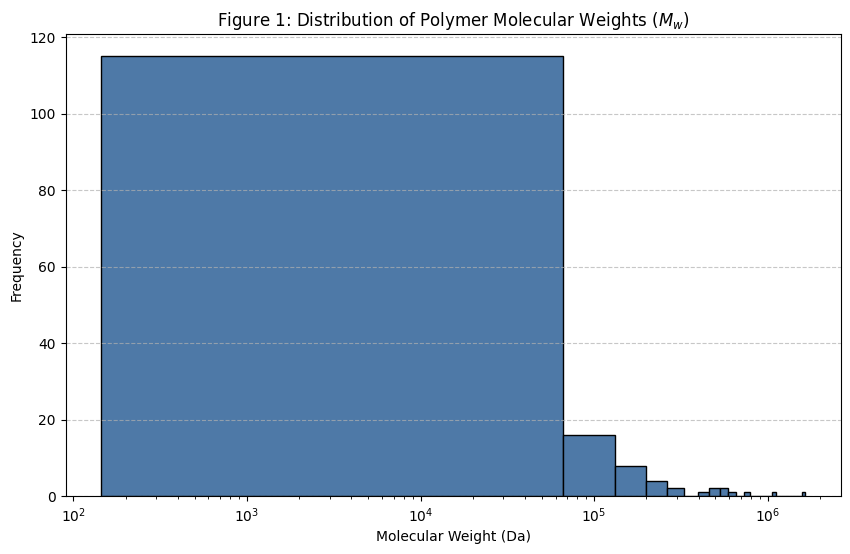

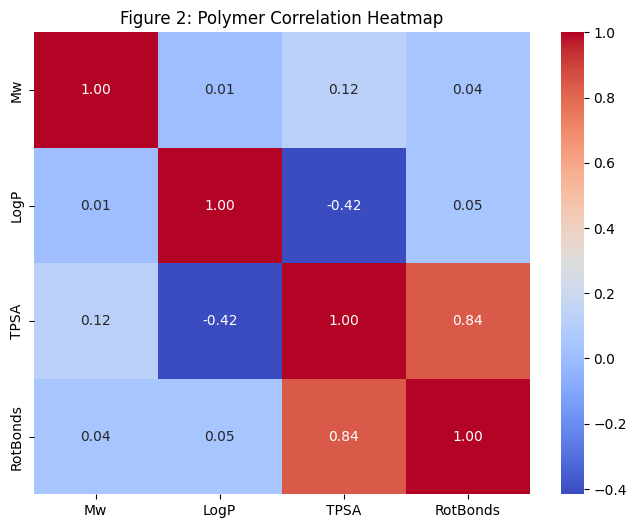

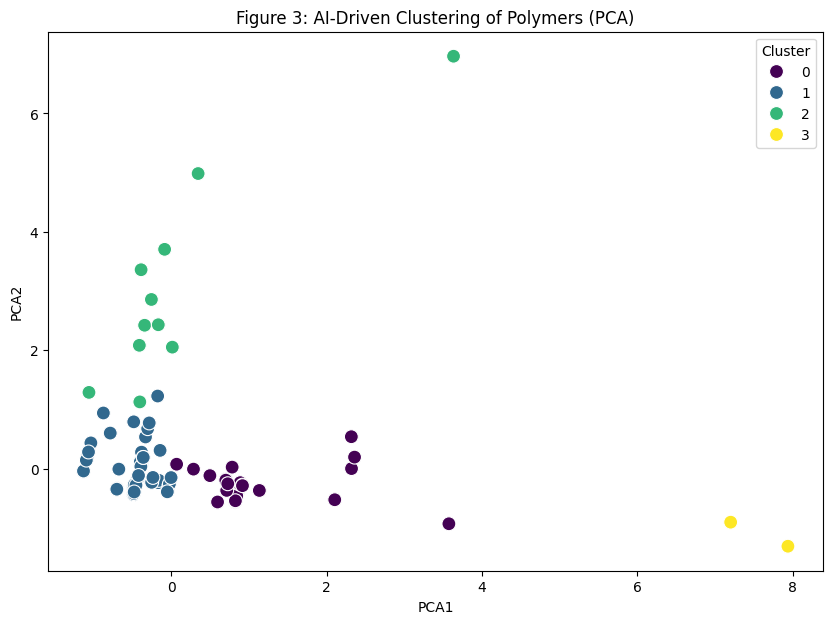

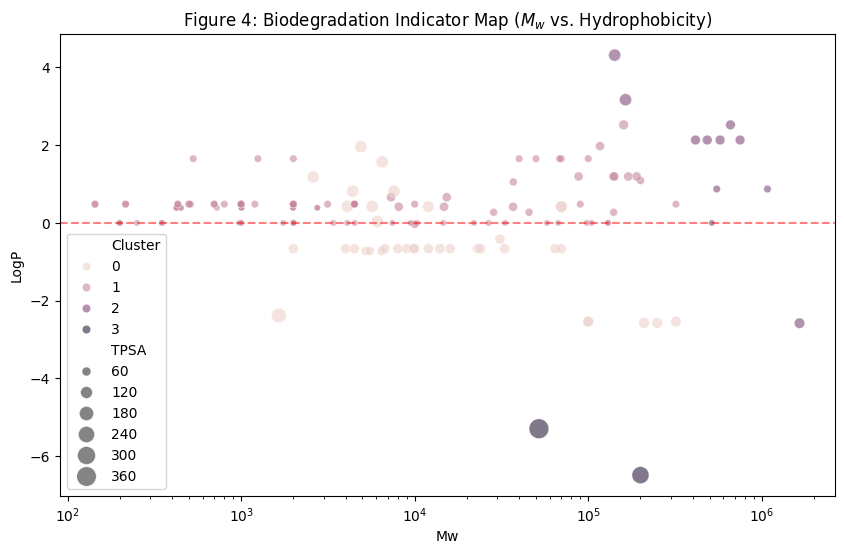

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load Dataset
df_poly = pd.read_excel('Datasets-3.xlsx')

# 1. Molecular Weight Distribution
plt.figure(figsize=(10, 6))
plt.hist(df_poly['Mw'].dropna(), bins=25, color='#4e79a7', edgecolor='black')
plt.title('Figure 1: Distribution of Polymer Molecular Weights ($M_w$)')
plt.xlabel('Molecular Weight (Da)')
plt.ylabel('Frequency')
plt.xscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('polymer_mw_distribution.png')

# Feature Extraction (RDKit)
def get_desc(smiles):
    mol = Chem.MolFromSmiles(str(smiles).replace('*', ''))
    if mol:
        return [Descriptors.MolLogP(mol), Descriptors.TPSA(mol), Descriptors.NumRotatableBonds(mol)]
    return [None, None, None]

df_poly[['LogP', 'TPSA', 'RotBonds']] = df_poly['Smiles'].apply(lambda x: pd.Series(get_desc(x)))
df_clean = df_poly.dropna(subset=['LogP', 'Mw'])

# 2. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean[['Mw', 'LogP', 'TPSA', 'RotBonds']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Figure 2: Polymer Correlation Heatmap')
plt.savefig('polymer_correlation_heatmap.png')

# 3. AI Clusters (K-Means)
X = StandardScaler().fit_transform(df_clean[['Mw', 'LogP', 'TPSA']])
df_clean['Cluster'] = KMeans(n_clusters=4, random_state=42).fit_predict(X)

pca = PCA(n_components=2)
pca_res = pca.fit_transform(X)
df_clean['PCA1'], df_clean['PCA2'] = pca_res[:, 0], pca_res[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_clean, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Figure 3: AI-Driven Clustering of Polymers (PCA)')
plt.savefig('polymer_ai_clusters.png')

# 4. Biodegradation Indicators (Mw vs LogP)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Mw', y='LogP', hue='Cluster', size='TPSA', sizes=(20, 200), alpha=0.6)
plt.xscale('log')
plt.title('Figure 4: Biodegradation Indicator Map ($M_w$ vs. Hydrophobicity)')
plt.axhline(0, color='red', linestyle='--', alpha=0.5) # Solubility threshold
plt.savefig('polymer_biodegradation_indicator.png')

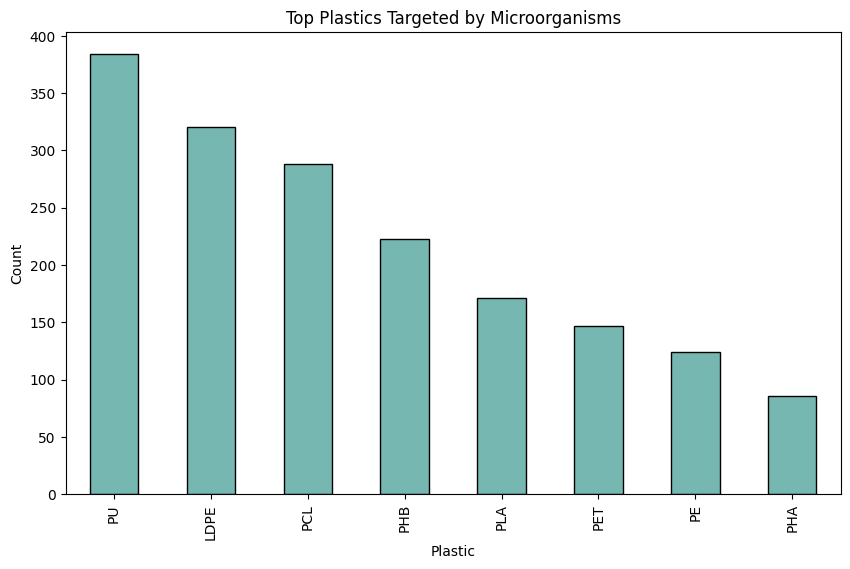

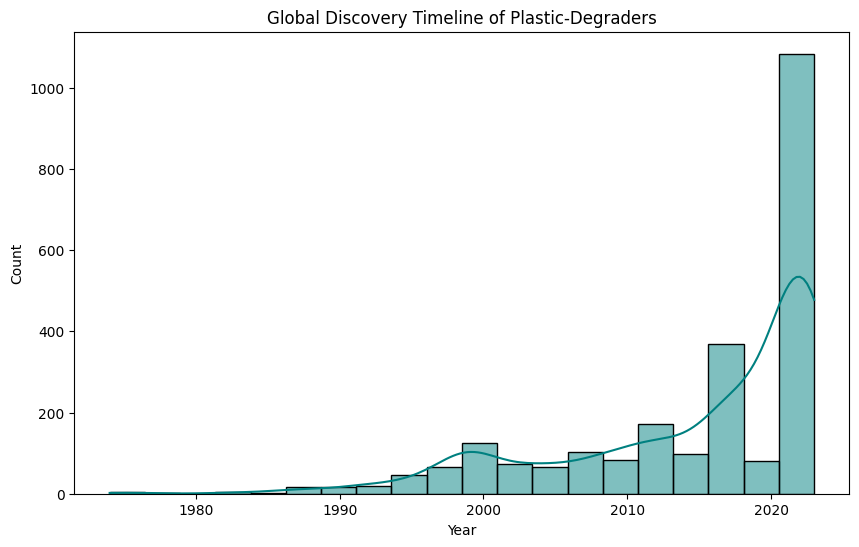

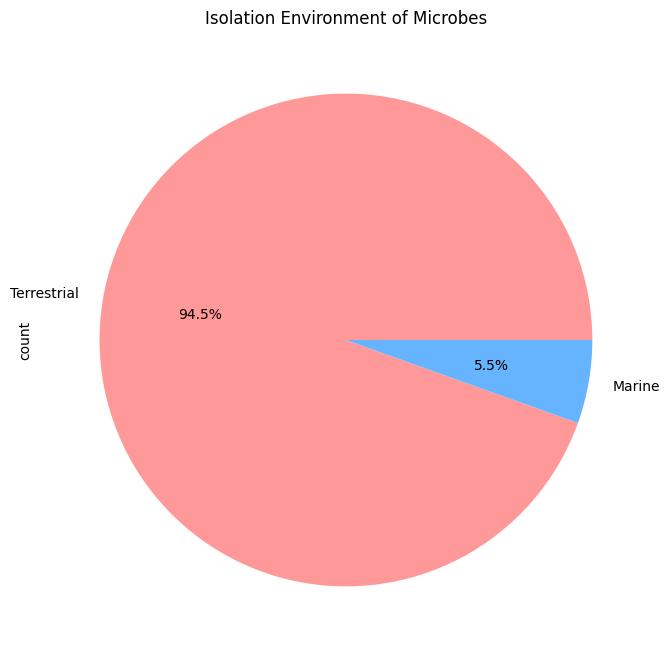

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_microbe = pd.read_excel('degraders_list.xls')

# 1. Top Plastic Targets
plt.figure(figsize=(10, 6))
df_microbe['Plastic'].value_counts().head(8).plot(kind='bar', color='#76b7b2', edgecolor='black')
plt.title('Top Plastics Targeted by Microorganisms')
plt.ylabel('Count')
plt.savefig('microbe_top_plastics.png')

# 2. Discovery Timeline
plt.figure(figsize=(10, 6))
sns.histplot(df_microbe['Year'], bins=20, kde=True, color='teal')
plt.title('Global Discovery Timeline of Plastic-Degraders')
plt.savefig('microbe_discovery_timeline.png')

# 3. Marine Environment Origin
plt.figure(figsize=(8, 8))
df_microbe['Is_Marine'] = df_microbe['Isolation environment'].astype(str).str.contains('Sea|Ocean|Marine|Water', case=False)
df_microbe['Is_Marine'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Terrestrial', 'Marine'], colors=['#ff9999','#66b3ff'])
plt.title('Isolation Environment of Microbes')
plt.savefig('microbe_environment_pie.png')

/tmp/ipython-input-1094576551.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=res.head(10), x='Biodegradation_Score', y='Label', palette='magma')


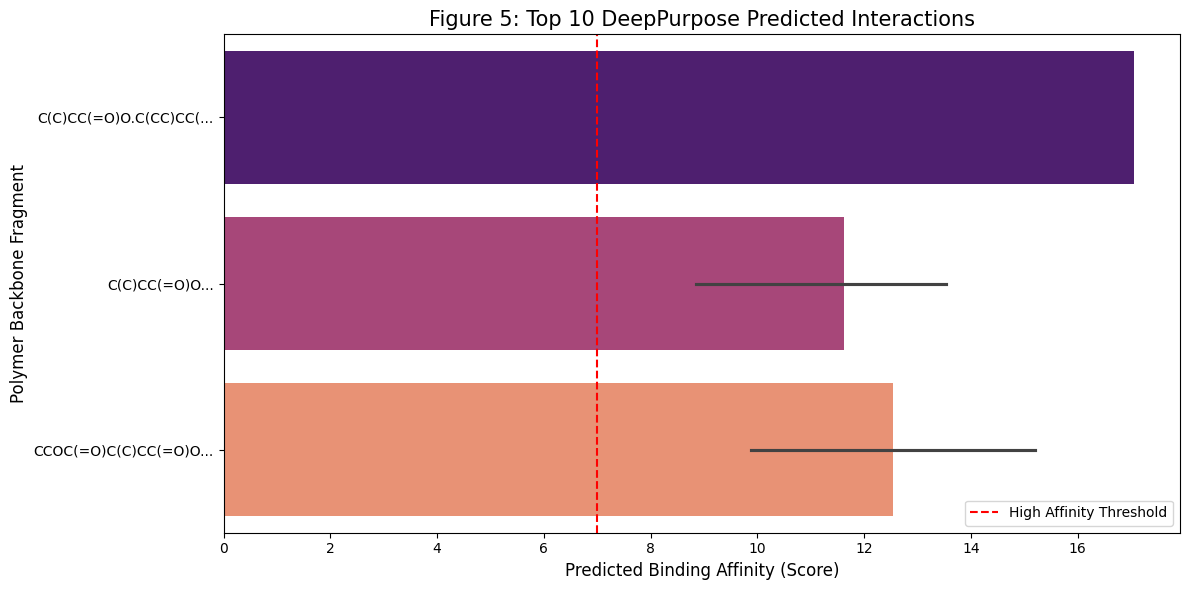

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DeepPurpose results
res = pd.read_csv('DeepPurpose_Marine_Final.csv')

# Clean labels for the graph
res['Label'] = res['Polymer_SMILES'].str[:20] + "..."

plt.figure(figsize=(12, 6))
sns.barplot(data=res.head(10), x='Biodegradation_Score', y='Label', palette='magma')
plt.title('Figure 5: Top 10 DeepPurpose Predicted Interactions', fontsize=15)
plt.xlabel('Predicted Binding Affinity (Score)', fontsize=12)
plt.ylabel('Polymer Backbone Fragment', fontsize=12)
plt.axvline(x=7.0, color='red', linestyle='--', label='High Affinity Threshold')
plt.legend()
plt.tight_layout()
plt.savefig('DeepPurpose_Top_Predictions.png')